## Using IMDb API to explore Series and Movie Ratings

#### Start by importing following libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

C:\Users\Jonatan\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Series and DataFrames are very handy for quickly converting data to something that can be used in plotting and preprocessing, e.g.

In [7]:
df = DataFrame(np.random.randint(0,100,(100,4)), columns=list("ABCD"))

Seaborn and MatPlotLib are used for plotting the data. A bar plot can be spun up really quickly using these libraries:

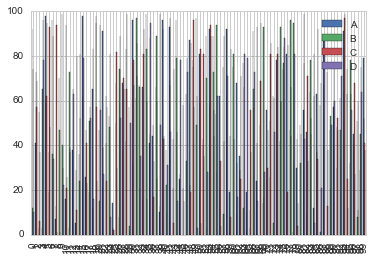

In [140]:
% matplotlib inline
sns.set_style("whitegrid")
df.plot(kind="bar")
plt.show()

Now, let's import imdbpie which is a library used for easily accessing the IMDb API:

In [141]:
from imdbpie import Imdb
imdb = Imdb()

Methods to use are found at https://github.com/richardasaurus/imdb-pie

In [32]:
tdk = imdb.search_for_title("The Dark Knight")
tdk_id = tdk[0]['imdb_id']
imdb.get_title_ratings(tdk_id)['rating']

9.0

I love watching Dragon's Den and Shark Tank, but the episode quality are varying a lot from season to season. I want to know which seasons to watch and which particular episodes are good. I start by searching the API for titles and trying to locate the match I am interested in:

In [142]:
dd = imdb.search_for_title("Dragon's Den")
dd_id = dd[3]['imdb_id']
imdb.get_title_ratings(dd_id)

{u'@type': u'imdb.api.title.ratings',
 u'canRate': True,
 u'disambiguation': u'II',
 u'id': u'/title/tt0443370/',
 u'rating': 7.1,
 u'ratingCount': 1241,
 u'title': u"Dragons' Den",
 u'titleType': u'tvSeries',
 u'year': 2005}

In [63]:
dd_df = DataFrame()
for i in range(1,16):
    dd_df = dd_df.append(DataFrame(imdb.get_title_episodes_detailed(dd[3]['imdb_id'],i)['episodes']))

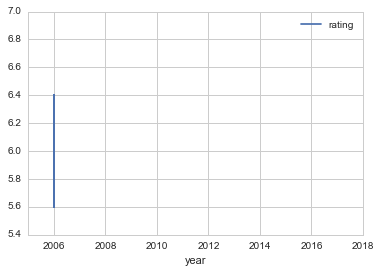

In [143]:
dd_plt = dd_df[['year', 'rating']]
dd_plt.plot(x='year')
plt.show()

Apparently, only the first episode was rated :(
Maybe I have better luck with Shark Tank

In [125]:
st = imdb.search_for_title("Shark Tank")
st_details = imdb.get_title_episodes_detailed(st[0]['imdb_id'],1)

In [77]:
st_df = DataFrame()
for i in range(1,10):
    st_df = st_df.append(DataFrame(imdb.get_title_episodes_detailed(st[0]['imdb_id'],i)['episodes']))

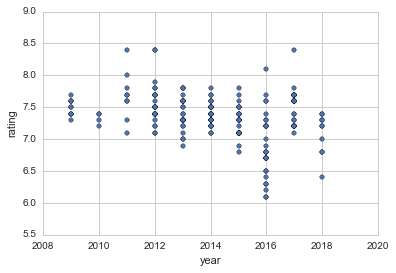

In [139]:
st_plt = st_df[['year', 'rating']]
st_plt.plot(x='year', y='rating', kind='scatter')
plt.show()

This is a lot more intesting. I plotted the ratings per year. It seems like the seasons started well, but has dropped in quality throughout the last few years.

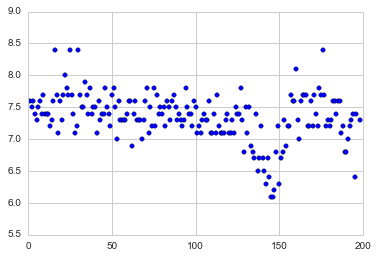

In [145]:
st_plt = st_df[['title', 'rating']]
st_plt.index = range(1,len(st_plt)+1)
plt.scatter(st_plt.index,st_plt['rating'])
#plt.xticks(range(1,len(st_plt)),st_df['title'], rotation=70)
plt.xlim([0,200])
plt.show()

Here, I have mapped each episode rating to look for particularly good episodes. The plot really shows the drop in rating the show had in 2016. To locate the specific episodes that have a significantly higher score the the rest, I have chosen to list the top 10 episodes by rating below:

In [127]:
st_df.sort_values('rating', ascending=False).iloc[0:10]

,episodeNumber,id,rating,ratingCount,releaseDate,title,userRating,watchOptions,year
6,7,/title/tt2260411/,8.4,57.0,"{u'date': None, u'first': {u'date': u'2012-03-...",Episode #3.7,None,"{u'hasDisk': None, u'hasInstant': None}",2012
1,2,/title/tt1868945/,8.4,57.0,"{u'date': None, u'first': {u'date': u'2011-03-...",Episode #2.2,None,"{u'hasDisk': None, u'hasInstant': None}",2011
0,1,/title/tt7414350/,8.4,13.0,"{u'date': None, u'first': {u'date': u'2017-10-...",Episode #9.1,None,"{u'hasDisk': None, u'hasInstant': None}",2017
1,2,/title/tt2188307/,8.4,61.0,"{u'date': None, u'first': {u'date': u'2012-01-...",Episode #3.2,None,"{u'hasDisk': None, u'hasInstant': None}",2012
8,9,/title/tt6264022/,8.1,11.0,"{u'date': None, u'first': {u'date': u'2016-11-...",Episode #8.9,None,"{u'hasDisk': None, u'hasInstant': None}",2016
7,8,/title/tt1910254/,8.0,49.0,"{u'date': None, u'first': {u'date': u'2011-05-...",Episode #2.8,None,"{u'hasDisk': None, u'hasInstant': None}",2011
10,11,/title/tt2339111/,7.9,48.0,"{u'date': None, u'first': {u'date': u'2012-04-...",Episode #3.11,None,"{u'hasDisk': None, u'hasInstant': None}",2012
12,13,/title/tt2603800/,7.8,37.0,"{u'date': None, u'first': {u'date': u'2013-01-...",Episode #4.13,None,"{u'hasDisk': None, u'hasInstant': None}",2013
22,23,/title/tt6837592/,7.8,9.0,"{u'date': None, u'first': {u'date': u'2017-05-...",Episode #8.23,None,"{u'hasDisk': None, u'hasInstant': None}",2017
4,5,/title/tt5059460/,7.8,37.0,"{u'date': None, u'first': {u'date': u'2015-10-...",Episode #7.5,None,"{u'hasDisk': None, u'hasInstant': None}",2015
